In [1]:
import sys
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import alphashape
import geopandas
import numpy as np


In [2]:
concs_AR = np.loadtxt(open("AgPd_AR_125_concs_81_final_submission_2.csv", "rb"), delimiter=",", skiprows=0)
AR_samps = np.loadtxt(open("AgPd_AR_125_samps_81_final_submission_2.csv", "rb"), delimiter=",", skiprows=0)
temps = np.linspace(200,900,15)
sz = 81


In [3]:
Samps = np.log10(np.exp(AR_samps)/5000)


In [13]:
print(np.log10(1.0/5000))

-3.6989700043360187


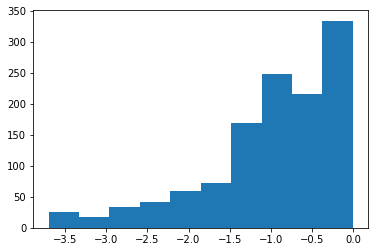

In [4]:
plt.hist(Samps.reshape(-1))
plt.show()

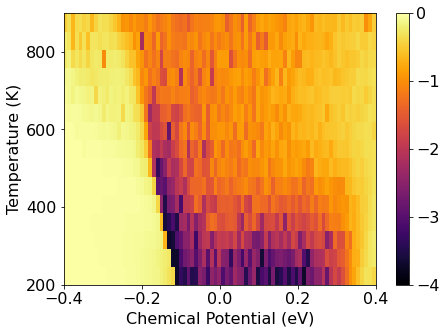

In [16]:
chem_p = np.linspace(-0.2,0.2,sz)
temps = np.linspace(200,900,15)

all_chem_p = []
all_temps = []
new_weights = []
for i in range(temps.shape[0]):
    for j in range(chem_p.shape[0]):
        all_temps.append(temps[i])
        all_chem_p.append(2*chem_p[j])
        if Samps[i,j] > -8.0:
            new_weights.append(Samps[i,j])
        else:
            new_weights.append(-1000)
            

        
plt.hist2d(all_chem_p,all_temps,bins = (sz,15), weights = new_weights,cmap='inferno',vmin=-4.0,vmax=0.0)
plt.rcParams["figure.figsize"] = (7,5)
plt.xlabel('Chemical Potential (eV)',fontsize=16)
plt.ylabel('Temperature (K)',fontsize=16)
plt.xticks(fontsize = 16,fontname = "Arial") 
plt.yticks(fontsize = 16,fontname = "Arial") 
plt.yticks([200,400,600,800])
plt.xticks([-0.4,-0.2,0.0,0.2,0.4])

cb = plt.colorbar()

imaxes = plt.gca()
plt.axes(cb.ax)
plt.yticks(fontsize=16,fontname = "Arial")
cb.set_ticks([-4.0,-3.0,-2.0,-1.0,0.0])
plt.savefig("NESS_5000_AgPd_125_Final_Submission.pdf",bbox_inches='tight')

In [21]:
import skimage
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage.segmentation import felzenszwalb


def F_Algo(Name,k,sig,save = 'False'):
    concs_AR = np.loadtxt(open("AgPd_AR_125_concs_81_final_submission" + Name + ".csv", "rb"), delimiter=",", skiprows=0)
    AR_samps = np.loadtxt(open("AgPd_AR_125_samps_81_final_submission" + Name + ".csv", "rb"), delimiter=",", skiprows=0)
    Samps = np.log10(np.exp(AR_samps)/5000)
    test = skimage.segmentation.felzenszwalb(Samps,scale=k, sigma=sig)
    chem_p = np.linspace(-0.2,0.2,sz)
    temps = np.linspace(200,900,15)

    all_chem_p = []
    all_temps = []
    tmp = []
    for i in range(temps.shape[0]):
        for j in range(chem_p.shape[0]):
            all_temps.append(temps[i])
            all_chem_p.append(2*chem_p[j])
            if Samps[i,j] > -8.0:
                tmp.append(test[i,j])
            else:
                tmp.append(-1000)
                
    plt.hist2d(all_chem_p,all_temps,bins = (sz,15), weights = tmp,cmap='inferno')
    plt.rcParams["figure.figsize"] = (7,5)
    plt.xlabel('Chemical Potential (eV)',fontsize=16)
    plt.ylabel('Temperature (K)',fontsize=16)
    plt.xticks(fontsize = 16,fontname = "Arial") 
    plt.yticks(fontsize = 16,fontname = "Arial") 
    plt.yticks([200,400,600,800])
    plt.xticks([-0.4,-0.2,0.0,0.2,0.4])

    plt.rcParams["figure.figsize"] = (7,5)
    
    if save == 'True':
        print("SAVED")
        plt.savefig("AgPd_125_NESS_Segmentation_Final_Submission.pdf",bbox_inches='tight')
    plt.show()
    

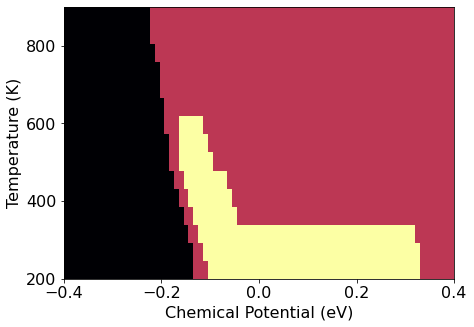

SAVED


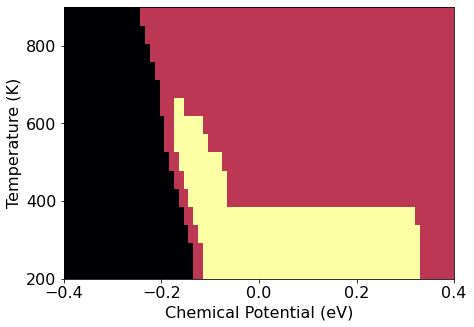

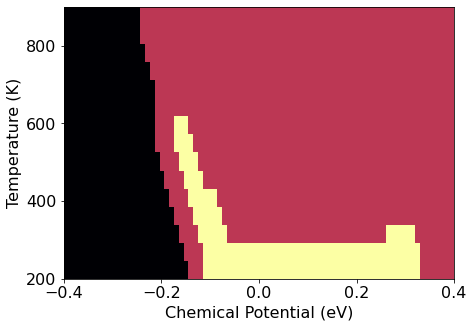

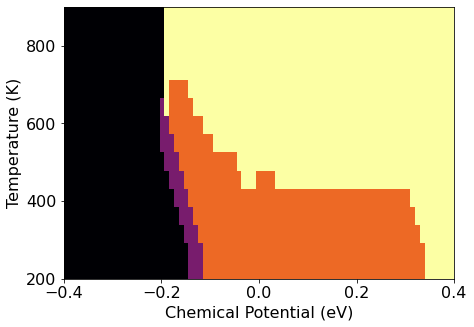

In [22]:
k = 1400
sig = 1.1

##### Save Second Example

F_Algo("",k,sig)
F_Algo("_2",k,sig,save='True')
F_Algo("_3",k,sig)
F_Algo("_4",k,sig)

In [10]:
concs_AR = np.loadtxt(open("AgPd_AR_125_concs_81_final_submission_2.csv", "rb"), delimiter=",", skiprows=0)
AR_samps = np.loadtxt(open("AgPd_AR_125_samps_81_final_submission_2.csv", "rb"), delimiter=",", skiprows=0)
Samps = np.log10(np.exp(AR_samps)/5000)
test = skimage.segmentation.felzenszwalb(Samps,scale=k, sigma=sig)

In [11]:
#### Critical Temperature
print(test[9,:])
print(test[10,:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [12]:
print(temps[9])

650.0
